In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/truna/Downloads/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.shape

(4240, 16)

In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Missing Data 

In [5]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.21%


In [6]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


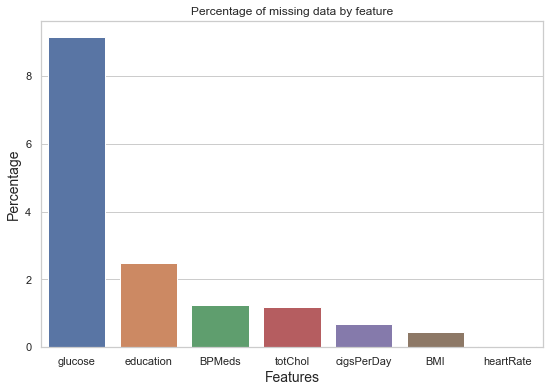

In [7]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

C:\Users\truna\AppData\Local\Temp/ipykernel_71520/887923207.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


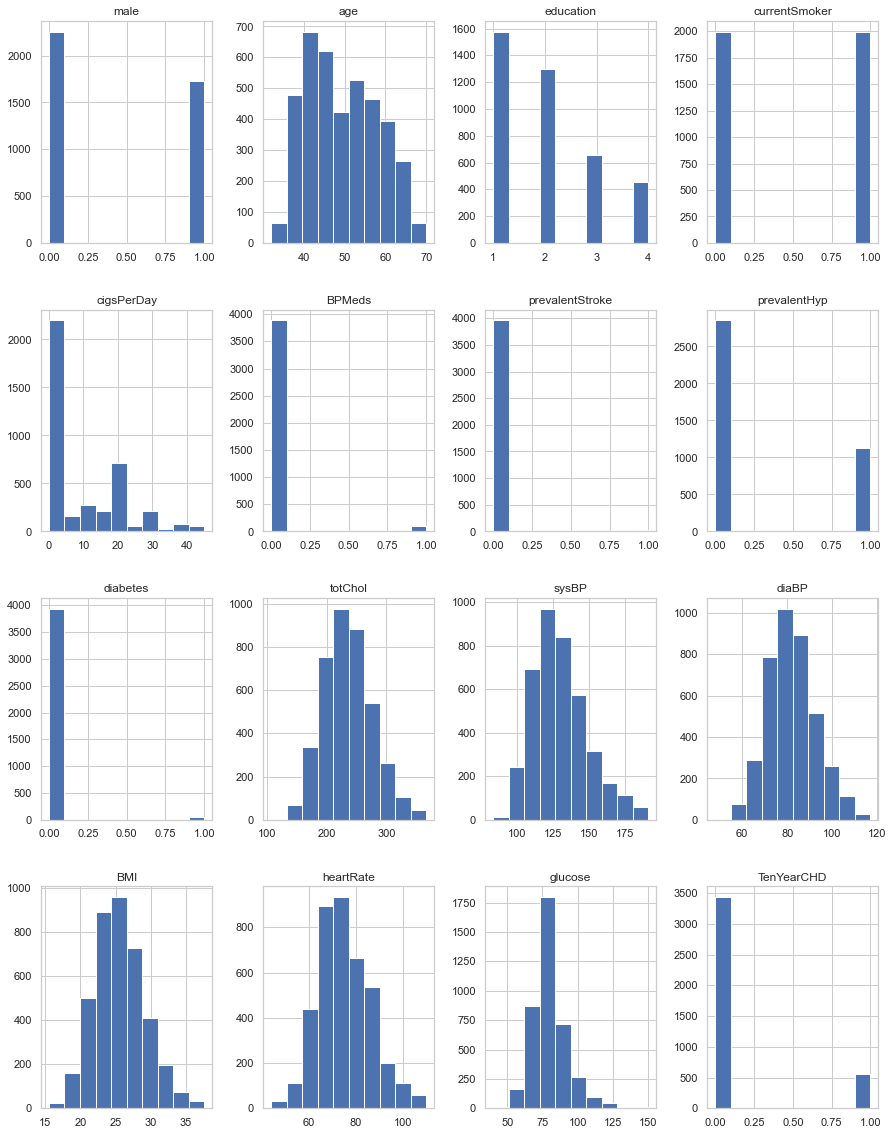

In [61]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

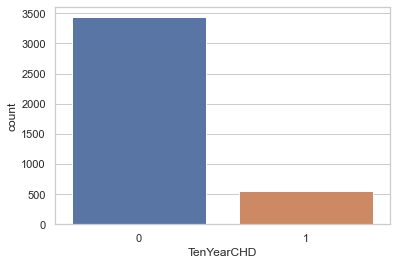

There are 3436 patients without heart disease and 551 patients with the disease


In [62]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

#### Number of people who have disease vs age 

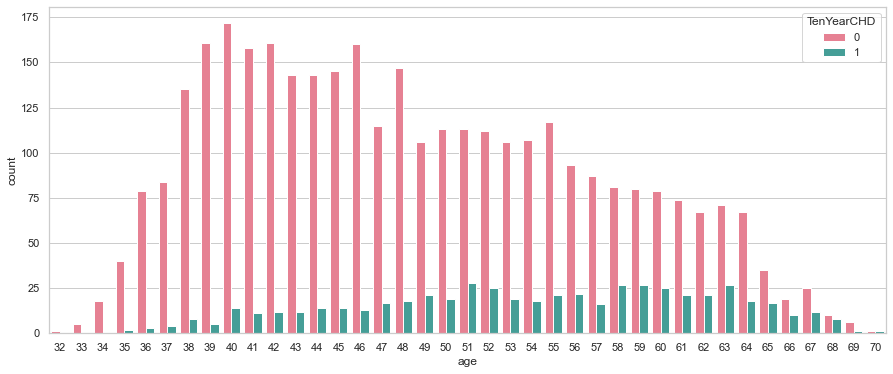

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

### Correlation Heat Map 

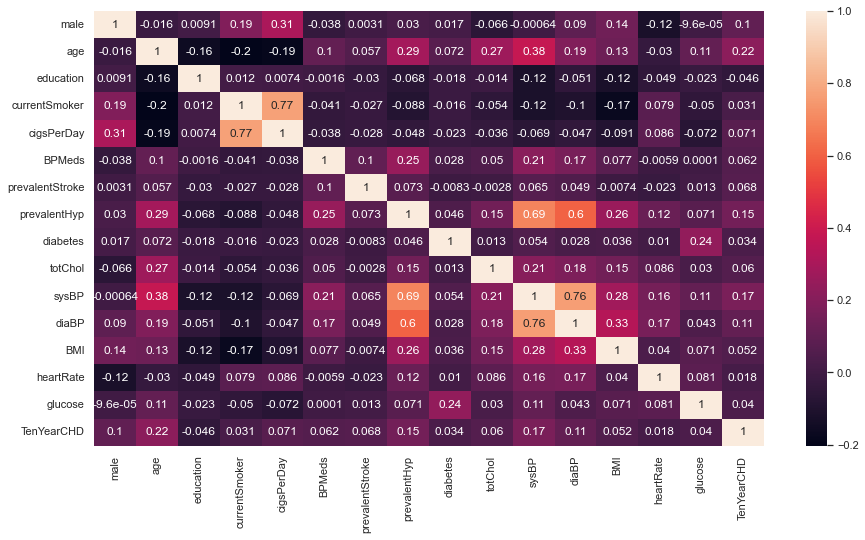

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [65]:
#### with the following function we can select the highly correlated features
def correlation(df,thresold):
    col_corr=set()   ### set of all the name of correlated columns
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])> thresold:
                colname=corr_matrix.columns[i]  ### geting the name of columns
                col_corr.add(colname)
    return  col_corr     


In [66]:
corr_features=correlation(data,0.8)
len(set(corr_features))

0

<AxesSubplot:xlabel='TenYearCHD', ylabel='Count'>

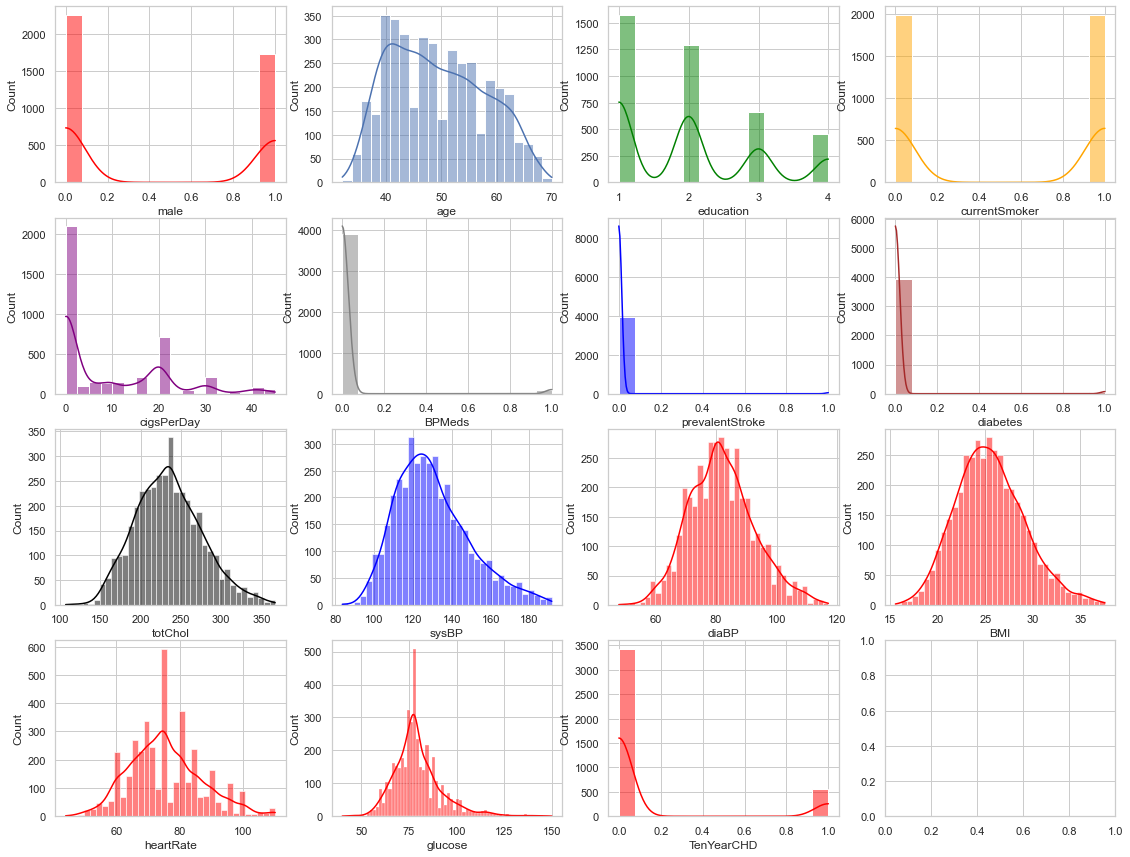

In [67]:
fig, ax=plt.subplots(4,4, figsize=(19,6), sharex= False, sharey = False)
fig.subplots_adjust(top=2)
sns.histplot(data['male'],kde=True,color="red",ax=ax[0,0])
sns.histplot(data['age'],label="Hist Of TEY",kde=True,ax=ax[0,1])
sns.histplot(data['education'],kde=True,color="green",ax=ax[0,2])
sns.histplot(data['currentSmoker'],kde=True,color="orange",ax=ax[0,3])
sns.histplot(data['cigsPerDay'],kde=True,color="purple",ax=ax[1,0])
sns.histplot(data['BPMeds'],kde=True,color="grey",ax=ax[1,1])
sns.histplot(data['prevalentStroke'],kde=True,color="blue",ax=ax[1,2])
sns.histplot(data['diabetes'],kde=True,color="brown",ax=ax[1,3])
sns.histplot(data['totChol'],kde=True,color="black",ax=ax[2,0])
sns.histplot(data['sysBP'],kde=True,color="blue",ax=ax[2,1])
sns.histplot(data['diaBP'],kde=True,color="red",ax=ax[2,2])
sns.histplot(data['BMI'],kde=True,color="red",ax=ax[2,3])
sns.histplot(data['heartRate'],kde=True,color="red",ax=ax[3,0])
sns.histplot(data['glucose'],kde=True,color="red",ax=ax[3,1])
sns.histplot(data['TenYearCHD'],kde=True,color="red",ax=ax[3,2])

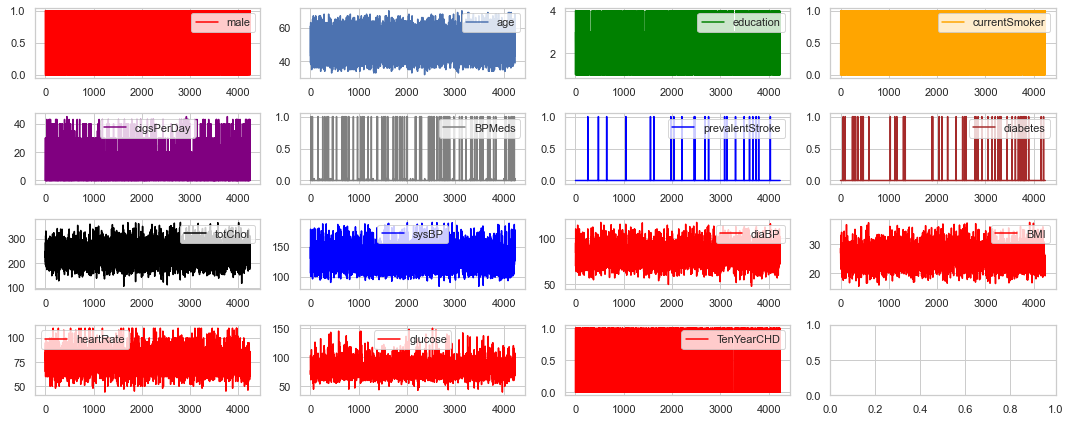

In [70]:
fig, ax=plt.subplots(nrows=4,ncols=4,figsize=(15,6))
data.plot(y='male',ax=ax[0,0],color='red')
data.plot(y='age',ax=ax[0,1])
data.plot(y='education',ax=ax[0,2],color='green')
data.plot(y='currentSmoker',ax=ax[0,3],color='orange')
data.plot(y='cigsPerDay',ax=ax[1,0],color='purple')
data.plot(y='BPMeds',ax=ax[1,1],color='grey')
data.plot(y='prevalentStroke',ax=ax[1,2],color='blue')
data.plot(y='diabetes',ax=ax[1,3],color='brown')
data.plot(y='totChol',ax=ax[2,0],color='black')
data.plot(y='sysBP',ax=ax[2,1],color='blue')
data.plot(y='diaBP',ax=ax[2,2],color='red')
data.plot(y='BMI',ax=ax[2,3],color='red')
data.plot(y='heartRate',ax=ax[3,0],color='red')
data.plot(y='glucose',ax=ax[3,1],color='red')
data.plot(y='TenYearCHD',ax=ax[3,2],color='red')
fig.tight_layout(pad=1)

### Fill Missing values 

In [8]:
######## Fill missing values
ind=data[data['glucose'].isnull()].index   ### It gives the index of nan values
li=list(ind)
da=data['glucose'].dropna()
median=np.median(da)
data.loc[li,'glucose']=median
data.head() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
ind=data[data['education'].isnull()].index   ### It gives the index of nan values
li=list(ind)
da=data['education'].dropna()
median=np.median(da)
data.loc[li,'education']=median
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
ind=data[data['BPMeds'].isnull()].index   ### It gives the index of nan values
li=list(ind)
da=data['BPMeds'].dropna()
mean=np.mean(da)
data.loc[li,'BPMeds']=mean
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
ind=data[data['totChol'].isnull()].index   ### It gives the index of nan values
li=list(ind)
da=data['totChol'].dropna()
median=np.median(da)
data.loc[li,'totChol']=median
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
ind=data[data['sysBP'].isnull()].index   ### It gives the index of nan values
li=list(ind)
da=data['sysBP'].dropna()
median=np.median(da)
data.loc[li,'sysBP']=median
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
ind=data[data['diaBP'].isnull()].index   
li=list(ind)
da=data['diaBP'].dropna()
median=np.median(da)
data.loc[li,'diaBP']=median
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
ind=data[data['cigsPerDay'].isnull()].index   
li=list(ind)
da=data['cigsPerDay'].dropna()
median=np.median(da)
data.loc[li,'cigsPerDay']=median
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
ind=data[data['BMI'].isnull()].index   
li=list(ind)
da=data['BMI'].dropna()
median=np.median(da)
data.loc[li,'BMI']= median
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
ind=data[data['heartRate'].isnull()].index   
li=list(ind)
da=data['heartRate'].dropna()
median=np.median(da)
data.loc[li,'heartRate']=median
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Boxplot 

<AxesSubplot:>

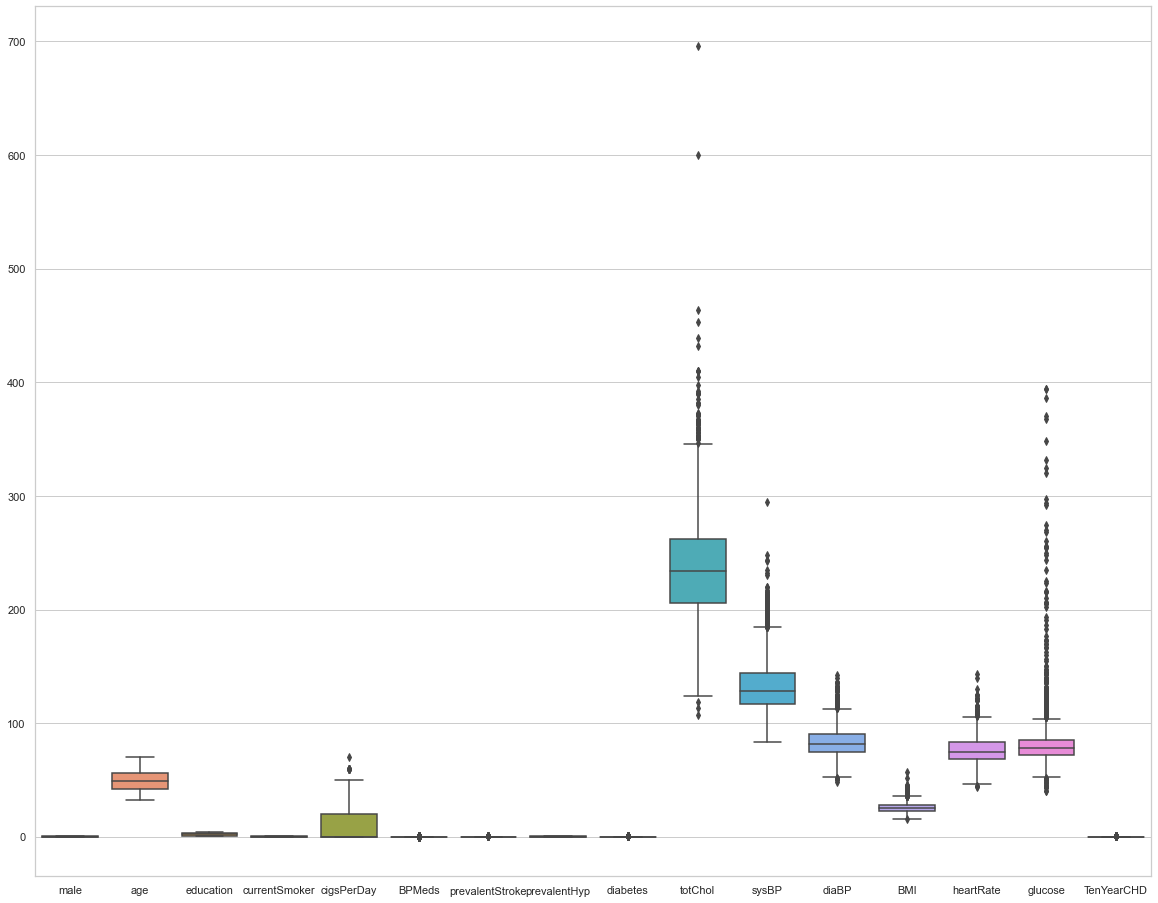

In [19]:
#outlier      
plt.figure(figsize=(20,16))  
sns.boxplot(data=data[numerical_features], orient="v")   

### Detecting Outlier 

In [20]:
def remove_outlier(data):
    points=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if(np.abs(z_score)>threshold):
            points.append(i)
            
    return points

new_glu=remove_outlier(data["glucose"])    

  

### Remove the outliers 

In [21]:
for i in range(len(new_glu)):
    b=list(data[data["glucose"]==new_glu[i]].index.values)
    data.drop(b, axis=0,inplace = True)

In [22]:
new_hr=remove_outlier(data["heartRate"])
for i in range(len(new_hr)):
    b=list(data[data["heartRate"]==new_hr[i]].index.values)
    data.drop(b, axis=0,inplace = True)     

In [23]:
new_bmi=remove_outlier(data["BMI"])
for i in range(len(new_bmi)):
    b=list(data[data["BMI"]==new_bmi[i]].index.values)
    data.drop(b, axis=0,inplace = True) 

In [24]:
new_BP=remove_outlier(data["diaBP"])
for i in range(len(new_BP)):
    b=list(data[data["diaBP"]==new_BP[i]].index.values)
    data.drop(b, axis=0,inplace = True) 

In [25]:
new_sys=remove_outlier(data["sysBP"])
for i in range(len(new_sys)):
    b=list(data[data["sysBP"]==new_sys[i]].index.values)
    data.drop(b, axis=0,inplace = True) 

In [26]:
new_chol=remove_outlier(data["totChol"])
for i in range(len(new_chol)):
    b=list(data[data["totChol"]==new_chol[i]].index.values)
    data.drop(b, axis=0,inplace = True) 

In [27]:
new_cigs=remove_outlier(data["cigsPerDay"])
for i in range(len(new_cigs)):
    b=list(data[data["cigsPerDay"]==new_cigs[i]].index.values)
    data.drop(b, axis=0,inplace = True) 

<AxesSubplot:>

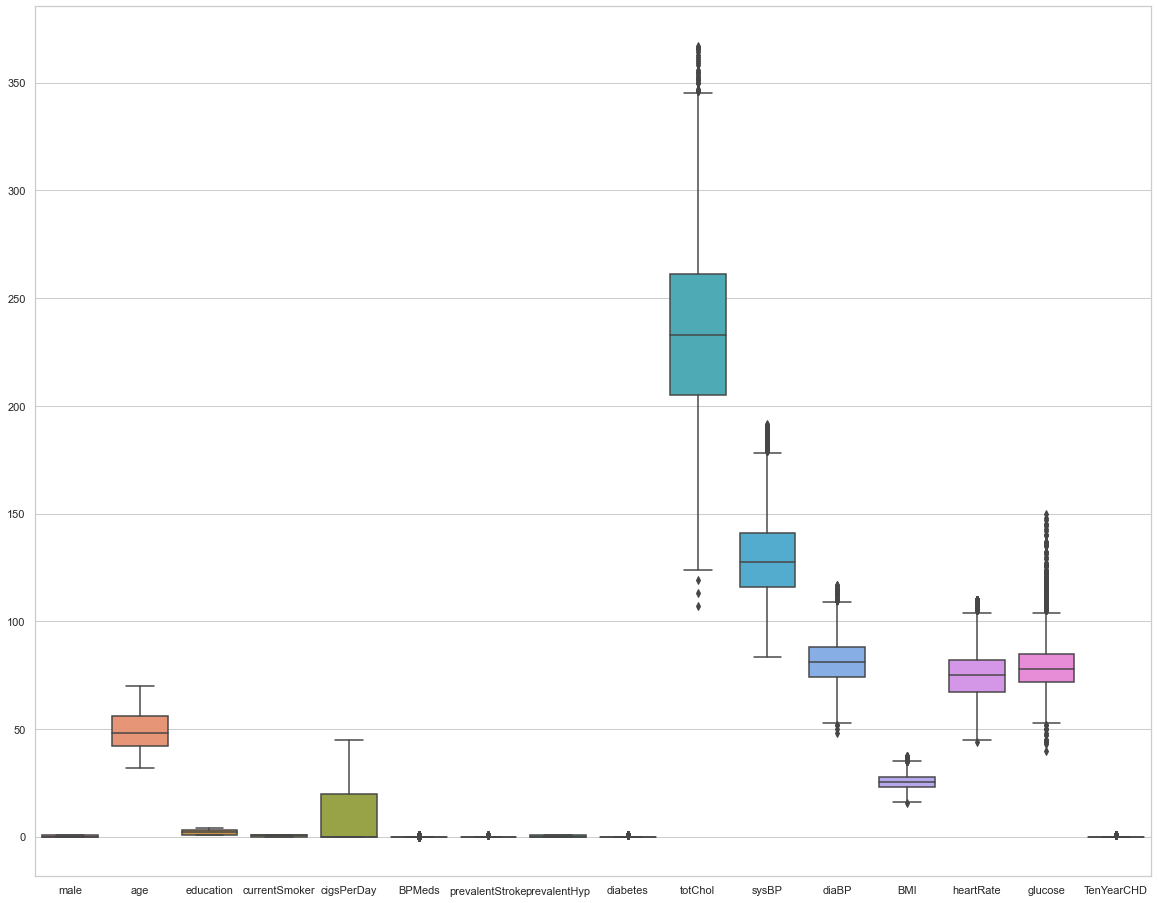

In [28]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=data[numerical_features], orient="v")

In [30]:
data.shape

(3987, 16)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [32]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [33]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [34]:
########### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### KNN 

In [35]:
######## KNN
##### Perform Feature scaling to bring the dta on same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
knn_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, knn_pred)
print(cm)
knn_accuracy=accuracy_score(y_test, knn_pred)
knn_accuracy

[[658  17]
 [118   5]]


0.8308270676691729

In [39]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test,knn_pred )
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 6.9%


In [41]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

### Logistic Regression 

In [42]:
####### logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
log_pred = classifier.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, log_pred)
print(cm)
log_accuracy=accuracy_score(y_test, log_pred)
log_accuracy

[[670   5]
 [116   7]]


0.8483709273182958

In [45]:
log_f1 = f1_score(y_test,log_pred )
print(f'The f1 score for logistic regression is {round(log_f1*100,2)}%')

The f1 score for logistic regression is 10.37%


### Random Forest 

In [46]:
######### Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
ran_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ran_pred)
print(cm)
random_forest_Accuracy=accuracy_score(y_test, ran_pred)
random_forest_Accuracy

[[664  11]
 [112  11]]


0.8458646616541353

In [49]:
ran_f1 = f1_score(y_test,ran_pred )
print(f'The f1 score for random Forest Classifier is {round(ran_f1*100,2)}%')

The f1 score for random Forest Classifier is 15.17%


### Support Vector Machine 

In [50]:
######## SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [51]:
svm_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, svm_pred)
print(cm)
SVM_Accuracy=accuracy_score(y_test, svm_pred)
SVM_Accuracy

[[669   6]
 [121   2]]


0.8408521303258145

In [53]:
svm_f1 = f1_score(y_test,svm_pred )
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 3.05%


### Naive bayes 

In [54]:
######### Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [55]:
Naive_pred = classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Naive_pred)
print(cm)
Naive_accuracy=accuracy_score(y_test, Naive_pred)
Naive_accuracy

[[638  37]
 [106  17]]


0.8208020050125313

In [57]:
Naive_f1 = f1_score(y_test,Naive_pred )
print(f'The f1 score for Naive Bayes is {round(Naive_f1*100,2)}%')

The f1 score for Naive Bayes is 19.21%


### Model Comparision 

In [58]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy},
    "K-nearest neighbours":{'Accuracy':knn_accuracy},
    "random_forest_Accuracy":{'Accuracy':random_forest_Accuracy},
    "Support vector machine":{'Accuracy':SVM_Accuracy},
    "Naive bayes":{'Accuracy':Naive_accuracy}
}).T

In [59]:
comparison

,Accuracy
Logistic regression,0.848371
K-nearest neighbours,0.830827
random_forest_Accuracy,0.845865
Support vector machine,0.840852
Naive bayes,0.820802


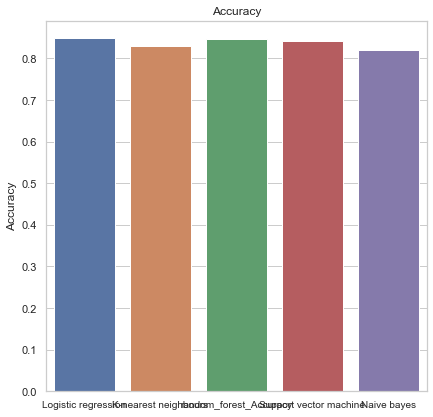

In [60]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

##### Logistic Regression gives higher accuracy as compaire to other models 